__1. Biochemistry & Molecular Biology__ (High Number of Publications) <br/>
__2. Management__ (Around average number ofpublications) <br/>
__3. Transportation__ (106673 - Discipline with atleast 6 digit count of publications)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import sys
sys.path.insert(0, "../../code-previous")

In [4]:
import pandas as pd
import numpy as np
import operator


import string
import nltk
stopwords = nltk.corpus.stopwords.words('english')

import operator
from collections import Counter

import pickle
from sklearn.feature_extraction.text import CountVectorizer

import plotly
import plotly.plotly as py
from plotly import tools

import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='sreejith_s', api_key='rcet0rTqFCc3WeOzWTjv')

from tqdm import tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set_style('white')
import matplotlib.pylab as plt

In [5]:
filename = "/mnt/disks/vault/analysis-data/interdisciplinary-novelty-analysis/corrected-entropy-analysis/word-journey-data.pql"
data_ = pd.read_pickle(filename)

In [27]:
d1 = "Biochemistry & Molecular Biology"
d2 = "Management"
d3 = "Transportation"

In [28]:
inp1 = data_[data_.Label == d1]
inp2 = data_[data_.Label == d2]
inp3 = data_[data_.Label == d3]

In [29]:
v1 = CountVectorizer()
vw1 = v1.fit_transform(inp1.title_words)

v2 = CountVectorizer()
vw2 = v2.fit_transform(inp2.title_words)

v3 = CountVectorizer()
vw3 = v3.fit_transform(inp3.title_words)

_Biochemistry & Molecular Biology_

In [30]:
cm1 = vw1.toarray()

unqs1 = []
cnts1 = []

for i in range(cm1.shape[0]):
    unique_, counts_tmp = np.unique(cm1[i:i+1,:], return_counts=True)    
    counts_ = list(map(np.log, counts_tmp))
    unqs1.append(unique_)
    cnts1.append(counts_)

In [31]:
yearly_word_frequency_variations1 = []
avg_variations_for_freq1 = []

for index in tqdm(range(cm1.shape[0] - 1)):
    
    # take two consecutive years
    tmp_ = cm1[index:index+2]
    #unique counts for the first year
    unique_counts = np.unique(tmp_[0]) 
    yearly_avg_variations_for_freq = {}
    word_freq_variations = []
    word_freq_variations.append(tmp_[1] - tmp_[0])
    yearly_word_frequency_variations1.append(word_freq_variations)
    
    for uniq in unique_counts:
        # find the indices where the value == uniq
        indices, = np.where(tmp_[0] == uniq)
        # find the values in the next year where those indices are
        # variations of words with that `uniq` count
        transition_values = tmp_[1][indices]
        variations = transition_values - uniq
        # mean variation of words with that `uniq` count
        mean_variation = np.mean(variations)
        # make a list of mean variations
        yearly_avg_variations_for_freq[uniq] = round(mean_variation, 3)
    
    avg_variations_for_freq1.append(yearly_avg_variations_for_freq)

100%|██████████| 116/116 [00:07<00:00,  6.50it/s]


_Management_

In [32]:
cm2 = vw2.toarray()

unqs2 = []
cnts2 = []

for i in range(cm1.shape[0]):
    unique_, counts_tmp = np.unique(cm1[i:i+1,:], return_counts=True)    
    counts_ = list(map(np.log, counts_tmp))
    unqs2.append(unique_)
    cnts2.append(counts_)

In [33]:
yearly_word_frequency_variations2 = []
avg_variations_for_freq2 = []

for index in tqdm(range(cm2.shape[0] - 1)):
    
    # take two consecutive years
    tmp_ = cm2[index:index+2]
    #unique counts for the first year
    unique_counts = np.unique(tmp_[0]) 
    yearly_avg_variations_for_freq = {}
    word_freq_variations = []
    word_freq_variations.append(tmp_[1] - tmp_[0])
    yearly_word_frequency_variations2.append(word_freq_variations)
    
    for uniq in unique_counts:
        # find the indices where the value == uniq
        indices, = np.where(tmp_[0] == uniq)
        # find the values in the next year where those indices are
        # variations of words with that `uniq` count
        transition_values = tmp_[1][indices]
        variations = transition_values - uniq
        # mean variation of words with that `uniq` count
        mean_variation = np.mean(variations)
        # make a list of mean variations
        yearly_avg_variations_for_freq[uniq] = round(mean_variation, 3)
    
    avg_variations_for_freq2.append(yearly_avg_variations_for_freq)

100%|██████████| 99/99 [00:00<00:00, 244.44it/s]


_Transportation_

In [34]:
cm3 = vw3.toarray()

unqs3 = []
cnts3 = []

for i in range(cm1.shape[0]):
    unique_, counts_tmp = np.unique(cm1[i:i+1,:], return_counts=True)    
    counts_ = list(map(np.log, counts_tmp))
    unqs3.append(unique_)
    cnts3.append(counts_)

In [35]:
yearly_word_frequency_variations3 = []
avg_variations_for_freq3 = []

for index in tqdm(range(cm3.shape[0] - 1)):
    
    # take two consecutive years
    tmp_ = cm3[index:index+2]
    #unique counts for the first year
    unique_counts = np.unique(tmp_[0]) 
    yearly_avg_variations_for_freq = {}
    word_freq_variations = []
    word_freq_variations.append(tmp_[1] - tmp_[0])
    yearly_word_frequency_variations3.append(word_freq_variations)
    
    for uniq in unique_counts:
        # find the indices where the value == uniq
        indices, = np.where(tmp_[0] == uniq)
        # find the values in the next year where those indices are
        # variations of words with that `uniq` count
        transition_values = tmp_[1][indices]
        variations = transition_values - uniq
        # mean variation of words with that `uniq` count
        mean_variation = np.mean(variations)
        # make a list of mean variations
        yearly_avg_variations_for_freq[uniq] = round(mean_variation, 3)
    
    avg_variations_for_freq3.append(yearly_avg_variations_for_freq)

100%|██████████| 61/61 [00:00<00:00, 463.16it/s]


In [36]:
print(cm2.shape)
print(cm3.shape)

(100, 41557)
(62, 21687)


cm2 start year = 2016 - 100 = 1916 <br/>
cm3 start year = 2016 - 62 = 1954

No handles with labels found to put in legend.


1433 words with 3 counts
282 words with 3 counts
78 words with 3 counts


No handles with labels found to put in legend.


1461 words with 3 counts
274 words with 3 counts
70 words with 3 counts
1461 words with 3 counts
249 words with 3 counts
93 words with 3 counts


No handles with labels found to put in legend.
No handles with labels found to put in legend.


1490 words with 3 counts
247 words with 3 counts
109 words with 3 counts
1461 words with 3 counts
284 words with 3 counts
103 words with 3 counts


No handles with labels found to put in legend.
No handles with labels found to put in legend.


1590 words with 3 counts
261 words with 3 counts
91 words with 3 counts


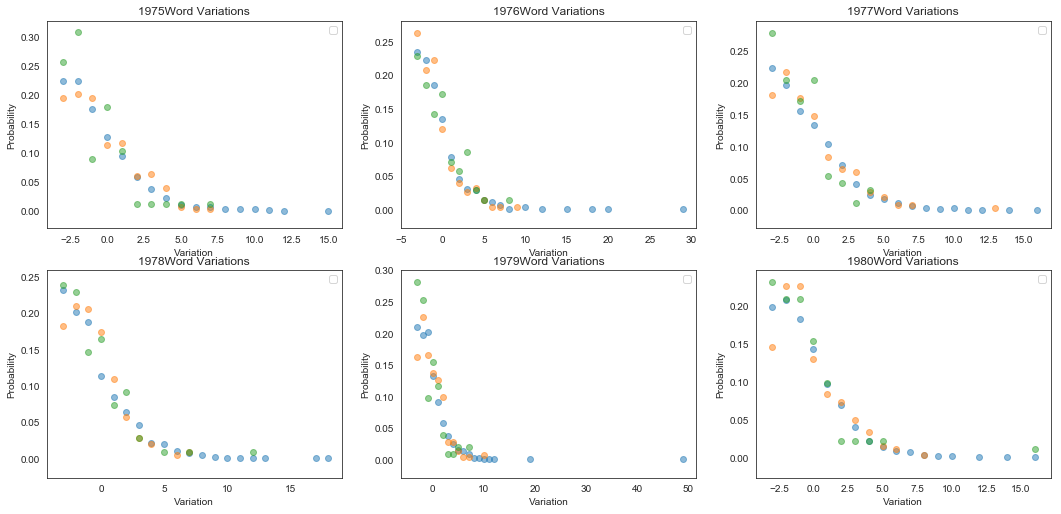

In [23]:
K = 3
f = plt.figure(figsize=(18,13))


year = 1975
N = 75

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  


N = 59

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  


N = 21

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax = f.add_subplot(331)
ax.scatter(X1, Y1, alpha=0.5)
ax.scatter(X2, Y2, alpha=0.5)
ax.scatter(X3, Y3, alpha=0.5)
ax.set_xlabel("Variation")
ax.set_ylabel("Probability")
ax.set_title(str(year) + "Word Variations")
ax.legend()


# 1976 - 1916
year = 1976
N = 76

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()] 

N = 60

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  


N = 22

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax2 = f.add_subplot(332)
ax2.scatter(X1, Y1, alpha=0.5)
ax2.scatter(X2, Y2, alpha=0.5)
ax2.scatter(X3, Y3, alpha=0.5)
ax2.set_xlabel("Variation")
ax2.set_ylabel("Probability")
ax2.set_title(str(year) + "Word Variations")
ax2.legend()



year = 1977
N = 77

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

N = 61

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

N = 23

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax3 = f.add_subplot(333)
ax3.scatter(X1, Y1, alpha=0.5)
ax3.scatter(X2, Y2, alpha=0.5)
ax3.scatter(X3, Y3, alpha=0.5)
ax3.set_xlabel("Variation")
ax3.set_ylabel("Probability")
ax3.set_title(str(year) + "Word Variations")
ax3.legend()



year = 1978
N = 78

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

N = 62

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

N = 24

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax4 = f.add_subplot(334)
ax4.scatter(X1, Y1, alpha=0.5)
ax4.scatter(X2, Y2, alpha=0.5)
ax4.scatter(X3, Y3, alpha=0.5)
ax4.set_xlabel("Variation")
ax4.set_ylabel("Probability")
ax4.set_title(str(year) + "Word Variations")
ax4.legend()


year = 1979
N = 79

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

N = 63

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

N = 25

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax5 = f.add_subplot(335)
ax5.scatter(X1, Y1, alpha=0.5)
ax5.scatter(X2, Y2, alpha=0.5)
ax5.scatter(X3, Y3, alpha=0.5)
ax5.set_xlabel("Variation")
ax5.set_ylabel("Probability")
ax5.set_title(str(year) + "Word Variations")
ax5.legend()


year = 1980
N = 80

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

N = 64

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

N = 26

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax6 = f.add_subplot(336)
ax6.scatter(X1, Y1, alpha=0.5)
ax6.scatter(X2, Y2, alpha=0.5)
ax6.scatter(X3, Y3, alpha=0.5)
ax6.set_xlabel("Variation")
ax6.set_ylabel("Probability")
ax6.set_title(str(year) + "Word Variations")
ax6.legend()

No handles with labels found to put in legend.


370 words with 7 counts
53 words with 7 counts
14 words with 7 counts
354 words with 7 counts
73 words with 7 counts
13 words with 7 counts


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


348 words with 7 counts
76 words with 7 counts
14 words with 7 counts
325 words with 7 counts
65 words with 7 counts
19 words with 7 counts


No handles with labels found to put in legend.
No handles with labels found to put in legend.


359 words with 7 counts
48 words with 7 counts
12 words with 7 counts
379 words with 7 counts
58 words with 7 counts
12 words with 7 counts


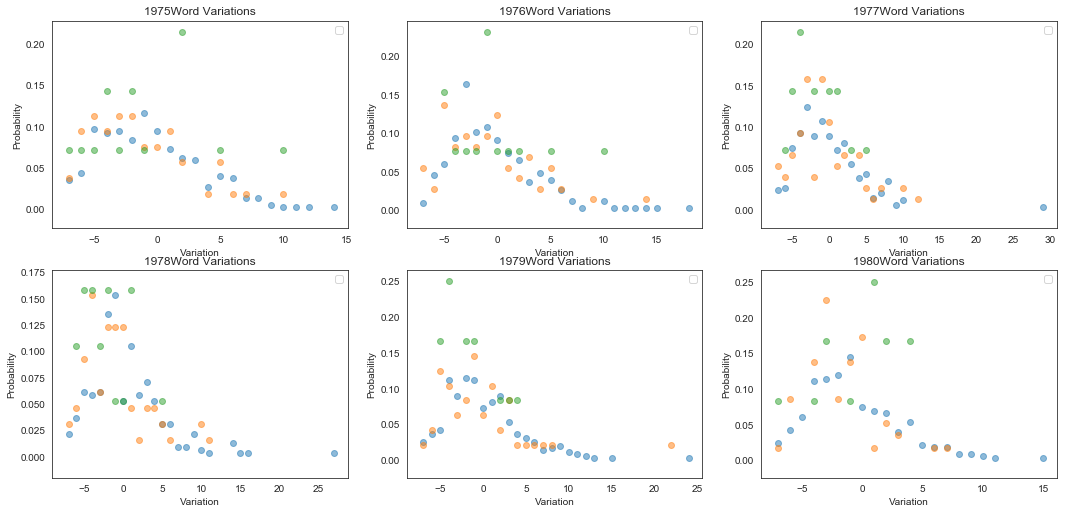

In [24]:
K = 7
f = plt.figure(figsize=(18,13))


year = 1975
N = 75

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  


N = 59

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  


N = 21

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax = f.add_subplot(331)
ax.scatter(X1, Y1, alpha=0.5)
ax.scatter(X2, Y2, alpha=0.5)
ax.scatter(X3, Y3, alpha=0.5)
ax.set_xlabel("Variation")
ax.set_ylabel("Probability")
ax.set_title(str(year) + "Word Variations")
ax.legend()


# 1976 - 1916
year = 1976
N = 76

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()] 

N = 60

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  


N = 22

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax2 = f.add_subplot(332)
ax2.scatter(X1, Y1, alpha=0.5)
ax2.scatter(X2, Y2, alpha=0.5)
ax2.scatter(X3, Y3, alpha=0.5)
ax2.set_xlabel("Variation")
ax2.set_ylabel("Probability")
ax2.set_title(str(year) + "Word Variations")
ax2.legend()



year = 1977
N = 77

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

N = 61

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

N = 23

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax3 = f.add_subplot(333)
ax3.scatter(X1, Y1, alpha=0.5)
ax3.scatter(X2, Y2, alpha=0.5)
ax3.scatter(X3, Y3, alpha=0.5)
ax3.set_xlabel("Variation")
ax3.set_ylabel("Probability")
ax3.set_title(str(year) + "Word Variations")
ax3.legend()



year = 1978
N = 78

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

N = 62

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

N = 24

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax4 = f.add_subplot(334)
ax4.scatter(X1, Y1, alpha=0.5)
ax4.scatter(X2, Y2, alpha=0.5)
ax4.scatter(X3, Y3, alpha=0.5)
ax4.set_xlabel("Variation")
ax4.set_ylabel("Probability")
ax4.set_title(str(year) + "Word Variations")
ax4.legend()


year = 1979
N = 79

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

N = 63

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

N = 25

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax5 = f.add_subplot(335)
ax5.scatter(X1, Y1, alpha=0.5)
ax5.scatter(X2, Y2, alpha=0.5)
ax5.scatter(X3, Y3, alpha=0.5)
ax5.set_xlabel("Variation")
ax5.set_ylabel("Probability")
ax5.set_title(str(year) + "Word Variations")
ax5.legend()


year = 1980
N = 80

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

N = 64

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

N = 26

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax6 = f.add_subplot(336)
ax6.scatter(X1, Y1, alpha=0.5)
ax6.scatter(X2, Y2, alpha=0.5)
ax6.scatter(X3, Y3, alpha=0.5)
ax6.set_xlabel("Variation")
ax6.set_ylabel("Probability")
ax6.set_title(str(year) + "Word Variations")
ax6.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


179 words with 10 counts
32 words with 10 counts
5 words with 10 counts
208 words with 10 counts
12 words with 10 counts
8 words with 10 counts


No handles with labels found to put in legend.


214 words with 10 counts
26 words with 10 counts
3 words with 10 counts
227 words with 10 counts
25 words with 10 counts
3 words with 10 counts


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


216 words with 10 counts
30 words with 10 counts
6 words with 10 counts
218 words with 10 counts
26 words with 10 counts
6 words with 10 counts


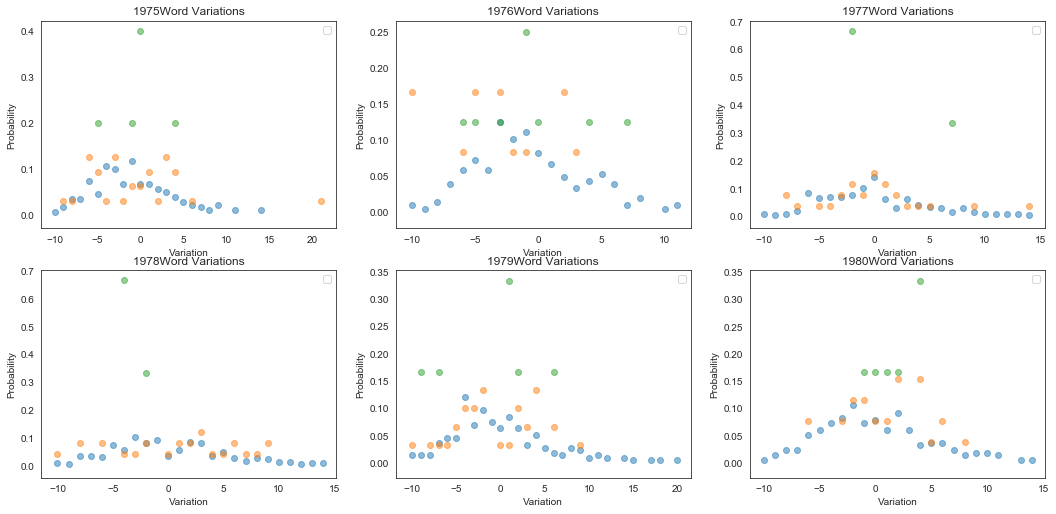

In [25]:
K = 10
f = plt.figure(figsize=(18,13))


year = 1975
N = 75

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  


N = 59

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  


N = 21

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax = f.add_subplot(331)
ax.scatter(X1, Y1, alpha=0.5)
ax.scatter(X2, Y2, alpha=0.5)
ax.scatter(X3, Y3, alpha=0.5)
ax.set_xlabel("Variation")
ax.set_ylabel("Probability")
ax.set_title(str(year) + "Word Variations")
ax.legend()


# 1976 - 1916
year = 1976
N = 76

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()] 

N = 60

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  


N = 22

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax2 = f.add_subplot(332)
ax2.scatter(X1, Y1, alpha=0.5)
ax2.scatter(X2, Y2, alpha=0.5)
ax2.scatter(X3, Y3, alpha=0.5)
ax2.set_xlabel("Variation")
ax2.set_ylabel("Probability")
ax2.set_title(str(year) + "Word Variations")
ax2.legend()



year = 1977
N = 77

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

N = 61

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

N = 23

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax3 = f.add_subplot(333)
ax3.scatter(X1, Y1, alpha=0.5)
ax3.scatter(X2, Y2, alpha=0.5)
ax3.scatter(X3, Y3, alpha=0.5)
ax3.set_xlabel("Variation")
ax3.set_ylabel("Probability")
ax3.set_title(str(year) + "Word Variations")
ax3.legend()



year = 1978
N = 78

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

N = 62

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

N = 24

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax4 = f.add_subplot(334)
ax4.scatter(X1, Y1, alpha=0.5)
ax4.scatter(X2, Y2, alpha=0.5)
ax4.scatter(X3, Y3, alpha=0.5)
ax4.set_xlabel("Variation")
ax4.set_ylabel("Probability")
ax4.set_title(str(year) + "Word Variations")
ax4.legend()


year = 1979
N = 79

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

N = 63

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

N = 25

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax5 = f.add_subplot(335)
ax5.scatter(X1, Y1, alpha=0.5)
ax5.scatter(X2, Y2, alpha=0.5)
ax5.scatter(X3, Y3, alpha=0.5)
ax5.set_xlabel("Variation")
ax5.set_ylabel("Probability")
ax5.set_title(str(year) + "Word Variations")
ax5.legend()


year = 1980
N = 80

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

N = 64

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

N = 26

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax6 = f.add_subplot(336)
ax6.scatter(X1, Y1, alpha=0.5)
ax6.scatter(X2, Y2, alpha=0.5)
ax6.scatter(X3, Y3, alpha=0.5)
ax6.set_xlabel("Variation")
ax6.set_ylabel("Probability")
ax6.set_title(str(year) + "Word Variations")
ax6.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


120 words with 13 counts
18 words with 13 counts
1 words with 13 counts
128 words with 13 counts
21 words with 13 counts
1 words with 13 counts


No handles with labels found to put in legend.


124 words with 13 counts
16 words with 13 counts
2 words with 13 counts
131 words with 13 counts
9 words with 13 counts
1 words with 13 counts


No handles with labels found to put in legend.
No handles with labels found to put in legend.


140 words with 13 counts
15 words with 13 counts
3 words with 13 counts
134 words with 13 counts
20 words with 13 counts
5 words with 13 counts


No handles with labels found to put in legend.


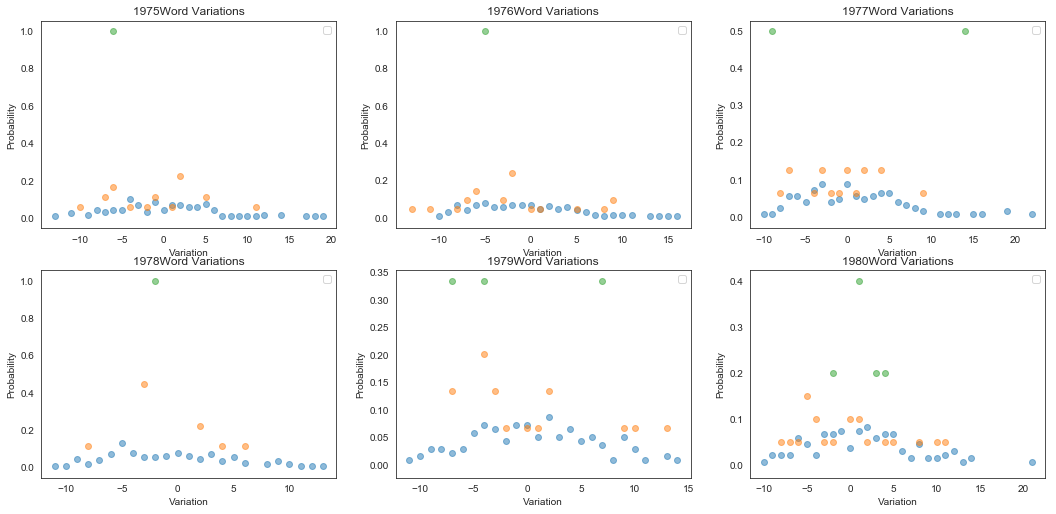

In [26]:
K = 13
f = plt.figure(figsize=(18,13))


year = 1975
N = 75

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  


N = 59

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  


N = 21

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax = f.add_subplot(331)
ax.scatter(X1, Y1, alpha=0.5)
ax.scatter(X2, Y2, alpha=0.5)
ax.scatter(X3, Y3, alpha=0.5)
ax.set_xlabel("Variation")
ax.set_ylabel("Probability")
ax.set_title(str(year) + "Word Variations")
ax.legend()


# 1976 - 1916
year = 1976
N = 76

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()] 

N = 60

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  


N = 22

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax2 = f.add_subplot(332)
ax2.scatter(X1, Y1, alpha=0.5)
ax2.scatter(X2, Y2, alpha=0.5)
ax2.scatter(X3, Y3, alpha=0.5)
ax2.set_xlabel("Variation")
ax2.set_ylabel("Probability")
ax2.set_title(str(year) + "Word Variations")
ax2.legend()



year = 1977
N = 77

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

N = 61

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

N = 23

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax3 = f.add_subplot(333)
ax3.scatter(X1, Y1, alpha=0.5)
ax3.scatter(X2, Y2, alpha=0.5)
ax3.scatter(X3, Y3, alpha=0.5)
ax3.set_xlabel("Variation")
ax3.set_ylabel("Probability")
ax3.set_title(str(year) + "Word Variations")
ax3.legend()



year = 1978
N = 78

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

N = 62

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

N = 24

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax4 = f.add_subplot(334)
ax4.scatter(X1, Y1, alpha=0.5)
ax4.scatter(X2, Y2, alpha=0.5)
ax4.scatter(X3, Y3, alpha=0.5)
ax4.set_xlabel("Variation")
ax4.set_ylabel("Probability")
ax4.set_title(str(year) + "Word Variations")
ax4.legend()


year = 1979
N = 79

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

N = 63

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

N = 25

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax5 = f.add_subplot(335)
ax5.scatter(X1, Y1, alpha=0.5)
ax5.scatter(X2, Y2, alpha=0.5)
ax5.scatter(X3, Y3, alpha=0.5)
ax5.set_xlabel("Variation")
ax5.set_ylabel("Probability")
ax5.set_title(str(year) + "Word Variations")
ax5.legend()


year = 1980
N = 80

freq_current1 = list(cm1[N:N+1,:][0])
freq_next1 = list(cm1[N+1:N+2,:][0])
indices1 = [i for i, x in enumerate(freq_current1) if x == K]
print(str(len(indices1)) + " words with " + str(K) + " counts")
change_in_values1 = [freq_next1[i] for i in indices1]
variations1 = [j - K for j in change_in_values1]
sum_ = sum(dict(Counter(variations1)).values())
X1 = [x for x,y in dict(Counter(variations1)).items()]
Y1 = [float(y)/sum_ for x,y in dict(Counter(variations1)).items()]  

N = 64

freq_current2 = list(cm2[N:N+1,:][0])
freq_next2 = list(cm2[N+1:N+2,:][0])
indices2 = [i for i, x in enumerate(freq_current2) if x == K]
print(str(len(indices2)) + " words with " + str(K) + " counts")
change_in_values2 = [freq_next2[i] for i in indices2]
variations2 = [j - K for j in change_in_values2]
sum_ = sum(dict(Counter(variations2)).values())
X2 = [x for x,y in dict(Counter(variations2)).items()]
Y2 = [float(y)/sum_ for x,y in dict(Counter(variations2)).items()]  

N = 26

freq_current3 = list(cm3[N:N+1,:][0])
freq_next3 = list(cm3[N+1:N+2,:][0])
indices3 = [i for i, x in enumerate(freq_current3) if x == K]
print(str(len(indices3)) + " words with " + str(K) + " counts")
change_in_values3 = [freq_next3[i] for i in indices3]
variations3 = [j - K for j in change_in_values3]
sum_ = sum(dict(Counter(variations3)).values())
X3 = [x for x,y in dict(Counter(variations3)).items()]
Y3 = [float(y)/sum_ for x,y in dict(Counter(variations3)).items()] 

ax6 = f.add_subplot(336)
ax6.scatter(X1, Y1, alpha=0.5)
ax6.scatter(X2, Y2, alpha=0.5)
ax6.scatter(X3, Y3, alpha=0.5)
ax6.set_xlabel("Variation")
ax6.set_ylabel("Probability")
ax6.set_title(str(year) + "Word Variations")
ax6.legend()